# Titanic Survivability

In [72]:
import pandas as pd
from sklearn.model_selection import train_test_split

Cargo los datos del titanic

In [73]:
# Cargar solo train
df = pd.read_csv('../data/train.csv')

Vamos a empezar a mostrar datos

In [74]:
%pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [75]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración estética para que se vean mejor
sns.set_theme(style="whitegrid")

Vamos a ver la supervivencia por género

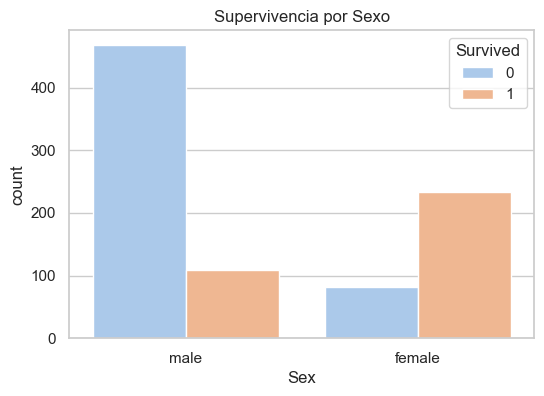

In [76]:
plt.figure(figsize=(6, 4))
# hue='Survived' es la clave: separa los datos por colores (0=Muere, 1=Vive)
sns.countplot(data=df, x='Sex', hue='Survived', palette='pastel')
plt.title('Supervivencia por Sexo')
plt.show()

Grafico en funcion de la clase

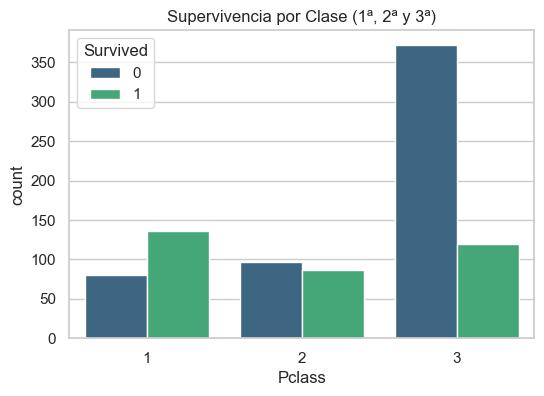

In [77]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Pclass', hue='Survived', palette='viridis')
plt.title('Supervivencia por Clase (1ª, 2ª y 3ª)')
plt.show()

Grafico en funcion de la edad

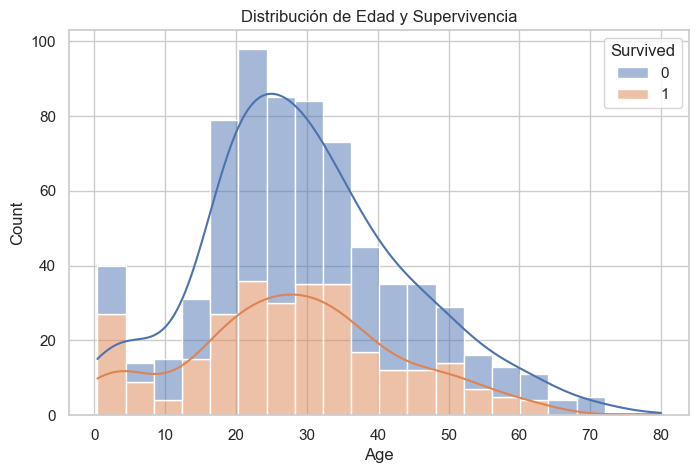

In [78]:
plt.figure(figsize=(8, 5))
# kde=True añade la línea suave de tendencia
sns.histplot(data=df, x='Age', hue='Survived', kde=True, multiple="stack")
plt.title('Distribución de Edad y Supervivencia')
plt.show()

Grafico en funcion de lo que pagaron

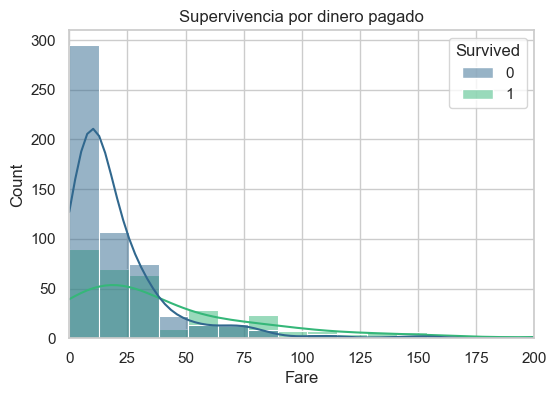

In [79]:
plt.figure(figsize=(6, 4))
sns.histplot(data=df, x='Fare', hue='Survived', palette='viridis', kde=True, bins=40)
plt.xlim(0, 200)
plt.title('Supervivencia por dinero pagado')
plt.show()

Como tenemos el tamaño de familiares repartido en 2 columnas, vamos a juntarlo en 1

C:\Users\aitor\AppData\Local\Temp\ipykernel_12272\1524663409.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='FamilySize', y='Survived', palette='viridis')


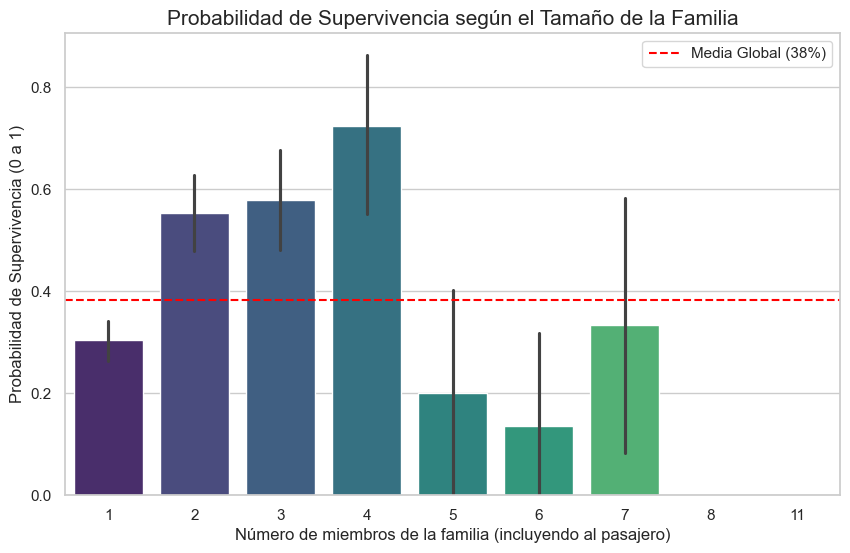

In [80]:
# Sumamos hermanos + padres + 1 (el propio pasajero)
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='FamilySize', y='Survived', palette='viridis')

plt.title('Probabilidad de Supervivencia según el Tamaño de la Familia', fontsize=15)
plt.xlabel('Número de miembros de la familia (incluyendo al pasajero)', fontsize=12)
plt.ylabel('Probabilidad de Supervivencia (0 a 1)', fontsize=12)

plt.axhline(df['Survived'].mean(), color='red', linestyle='--', label='Media Global (38%)')
plt.legend()

plt.show()

In [81]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  FamilySize   891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


Vamos a procesar los datos

In [83]:
def procesar_datos(data):
    # Eliminar columnas inútiles o con demasiados nulos
    cols_a_borrar = ['PassengerId', 'Name', 'Ticket', 'Cabin']
    data = data.drop(cols_a_borrar, axis=1)

    # Rellenar valores faltantes (Nulos)
    # Edad: Usamos la mediana porque es menos sensible a los viejos ricos (outliers)
    data['Age'] = data['Age'].fillna(data['Age'].median())

    # Embarked: Usamos la moda (el valor más común, que suele ser 'S')
    moda_embarked = data['Embarked'].mode()[0]
    data['Embarked'] = data['Embarked'].fillna(moda_embarked)

    # Convertir Texto a Números (Encoding)
    # Sexo: hombre=0, mujer=1
    data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})
        
    # Embarked: Southampton(S)=0, Cherbourg(C)=1, Queenstown(Q)=2
    data['Embarked'] = data['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

    return data

In [84]:
df_limpio = df.copy()
df_limpio = procesar_datos(df_limpio)

# Verificamos que ya no hay nulos y todo son números
print("--- Información del Dataset Limpio ---")
df_limpio.info()

--- Información del Dataset Limpio ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Sex         891 non-null    int64  
 3   Age         891 non-null    float64
 4   SibSp       891 non-null    int64  
 5   Parch       891 non-null    int64  
 6   Fare        891 non-null    float64
 7   Embarked    891 non-null    int64  
 8   FamilySize  891 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 62.8 KB


In [85]:
df_limpio.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize
0,0,3,0,22.0,1,0,7.2500,0,2
1,1,1,1,38.0,1,0,71.2833,1,2
2,1,3,1,26.0,0,0,7.9250,0,1
3,1,1,1,35.0,1,0,53.1000,0,2
4,0,3,0,35.0,0,0,8.0500,0,1


Ya con los datos listos vamos a dividirlos en entrenamiento y examen

In [86]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [87]:
X = df_limpio.drop('Survived', axis=1) 
y = df_limpio['Survived']             

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [89]:
modelo = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)

In [90]:
modelo.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


Ya tenemos el modelo entrenado, ahora vamos a realizar las predicciones y las notas

In [91]:
y_pred = modelo.predict(X_test)

In [92]:
# Calculamos la nota (Accuracy)
nota = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo: {nota:.2%}")

Precisión del modelo: 80.45%


In [93]:
# Matriz de Confusión (Para ver en qué falla)
print("\n--- Matriz de Confusión ---")
print(confusion_matrix(y_test, y_pred))


--- Matriz de Confusión ---
[[93 12]
 [23 51]]


Ahora con el modelo vamos a exportarlo

In [94]:
import joblib

joblib.dump(modelo, '../streamlit_app/model/modelo_titanic.pkl')

['../model/modelo_titanic.pkl']